<a href="https://colab.research.google.com/github/Yucheol-Son-BYUI/CSE310_W0_HelloWorld/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.025493,2.564407,962.221803,0.173730,0.081526,93.576551,-40.494829,3.621945,5167.010650
std,10.435288,2.764084,187.531477,0.496159,1.572287,0.579339,4.628895,1.734496,72.294476
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [28]:
df.describe(exclude='number').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

1. Since 88% of our target labels are 'no,' we're dealing with a class imbalance. We should prioritize the F1-score over Accuracy.

2. At least 75% of the pdays values are '999.' This definitely needs special handling since it's a placeholder, not a literal number.

3. Should we clip the outliers in the campaign column, like that maximum value of 56?

4. The default column is overwhelmingly 'no' (29,341 cases). We need to figure out if it even provides enough information for the model.

5. We should normalize our quantitative features, especially if we're planning to use distance-based models.

In [30]:
# ## Pdays
# # 1. Create the 'is_new_customer' binary flag
# df['is_new_customer'] = (df['pdays'] == 999).astype(int)

# # 2. Replace the placeholder original 999 with -1
# df['pdays'] = df['pdays'].replace(999, -1)

# # print(df[['pdays', 'is_new_customer']].head(10))

# ## education as ordinal data
# edu_mapping = {
#     'illiterate': 0,
#     'unknown': 1,  # You can also use -1 here
#     'basic.4y': 2,
#     'basic.6y': 3,
#     'basic.9y': 4,
#     'high.school': 5,
#     'professional.course': 6,
#     'university.degree': 7
# }

# df['education'] = df['education'].map(edu_mapping)

# ## Other Categorical Data
# ## One-hot encoding
# categorical_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# df_final = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# df_final['y'] = df_final['y'].map({'yes': 1, 'no': 0})


Preprocessing and feature engineering completed!
df_final shape: (37069, 53)


/tmp/ipython-input-264495666.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df_final, ax=axes[i], palette='Set2')
/tmp/ipython-input-264495666.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df_final, ax=axes[i], palette='Set2')
/tmp/ipython-input-264495666.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df_final, ax=axes[i], palette='Set2')
/tmp/ipython-input-264495666.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

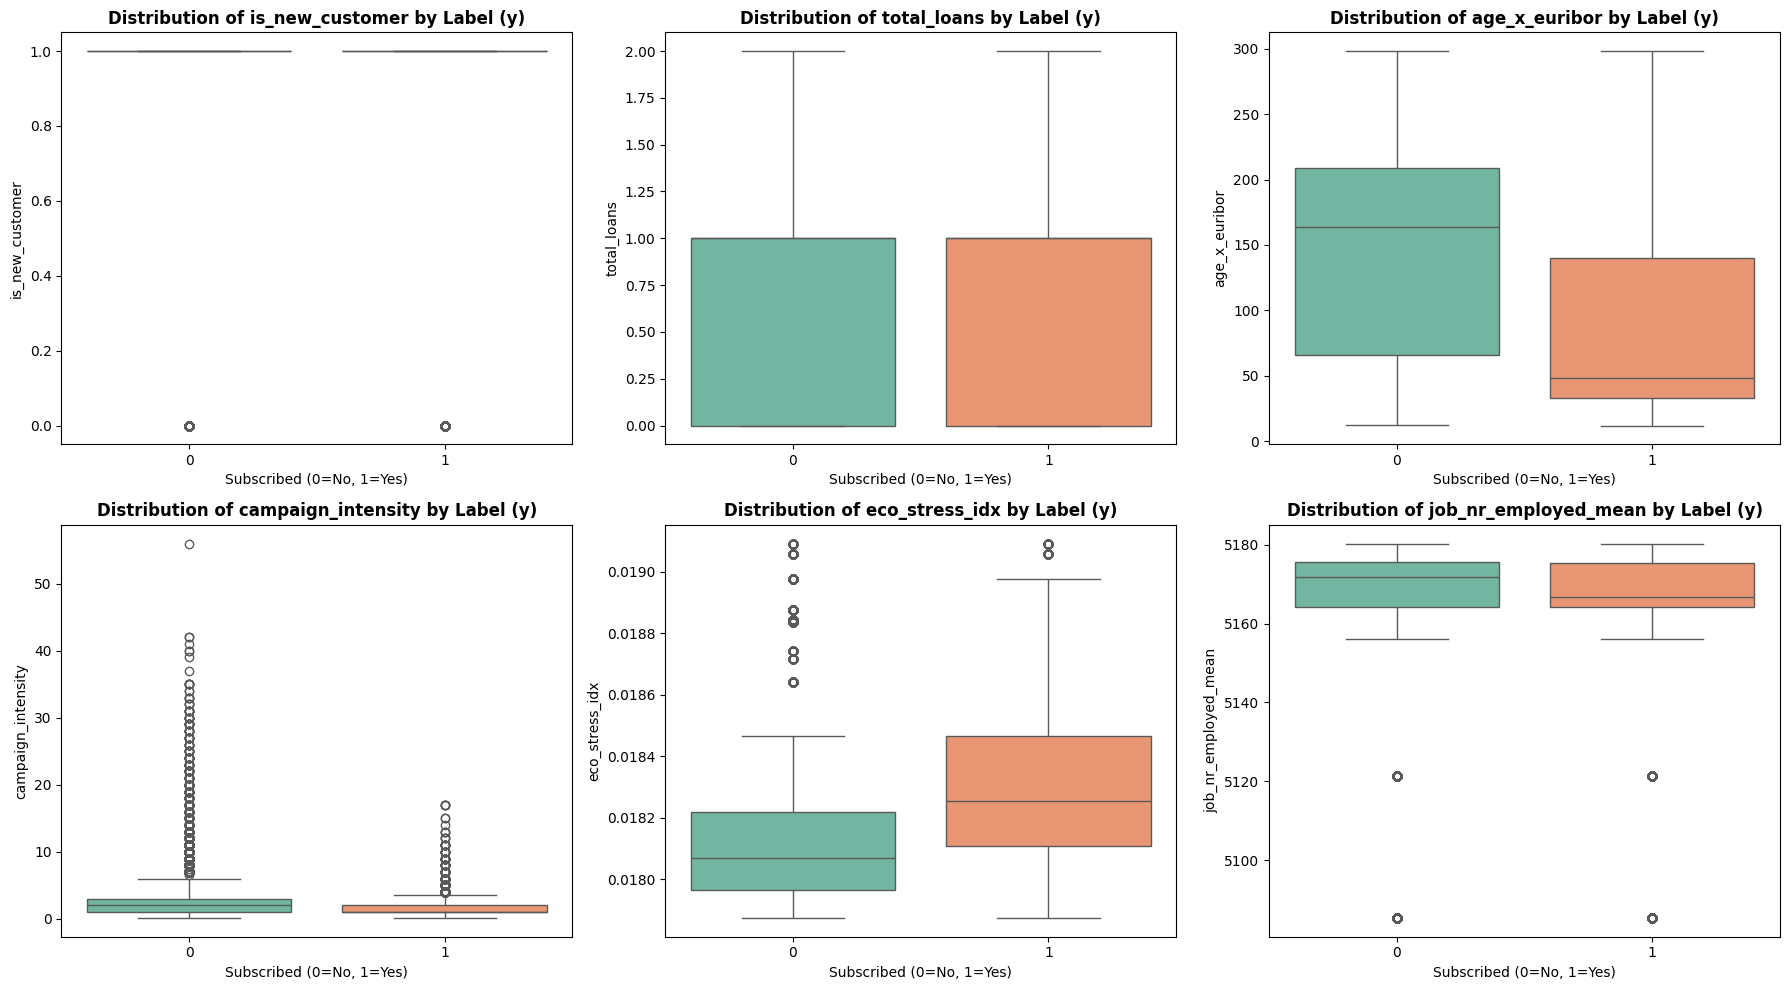

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data (Assuming df is already loaded or load as an example here)
# df = pd.read_csv("your_data.csv")

# ==========================================
# 1. Existing Preprocessing (Pdays, Education)
# ==========================================

# Pdays: Create 'is_new_customer' binary flag
df['is_new_customer'] = (df['pdays'] == 999).astype(int)

# Pdays: Replace 999 with -1
df['pdays'] = df['pdays'].replace(999, -1)

# Education mapping
edu_mapping = {
    'illiterate': 0, 'unknown': 1, 'basic.4y': 2, 'basic.6y': 3,
    'basic.9y': 4, 'high.school': 5, 'professional.course': 6, 'university.degree': 7
}
df['education'] = df['education'].map(edu_mapping)

# 2. Feature Engineering
# Must calculate before One-Hot Encoding because columns like 'job' and 'housing' will disappear.

# (1) Financial Burden (Total Loans): Count of housing loans + personal loans
df['total_loans'] = (df['housing'] == 'yes').astype(int) + (df['loan'] == 'yes').astype(int)

# (2) Interest Rate Sensitivity (Age x Euribor): Age * Euribor 3 month rate
df['age_x_euribor'] = df['age'] * df['euribor3m']

# (3) Campaign Fatigue (Campaign Intensity): Current campaign contacts / (Previous contacts + 1)
df['campaign_intensity'] = df['campaign'] / (df['previous'] + 1)

# (4) Economic Stress Index (Eco Stress Index): Consumer Price Index / Number of Employees
df['eco_stress_idx'] = df['cons.price.idx'] / df['nr.employed']

# (5) Job-wise Employment Mean: Average number of employees for that specific job category
# Reflects the economic situation (nr.employed) specific to each job type at the time
df['job_nr_employed_mean'] = df.groupby('job')['nr.employed'].transform('mean')

# 3. One-Hot Encoding & Label Mapping

categorical_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Create dummy variables with drop_first=True (original categorical columns will be removed)
df_final = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Map target variable 'y' to 1 and 0
df_final['y'] = df_final['y'].map({'yes': 1, 'no': 0})

print("Preprocessing and feature engineering completed!")
print("df_final shape:", df_final.shape)

# 4. Visualization for new features

new_features = [
    'is_new_customer',
    'total_loans',
    'age_x_euribor',
    'campaign_intensity',
    'eco_stress_idx',
    'job_nr_employed_mean'
]

# 2x3 graph matrix
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(new_features):
    sns.boxplot(x='y', y=col, data=df_final, ax=axes[i], palette='Set2')

    axes[i].set_title(f'Distribution of {col} by Label (y)', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Subscribed (0=No, 1=Yes)')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [32]:
# get rid of unsignificant derived variables
cols_to_remove = ['is_new_customer', 'total_loans', 'job_nr_employed_mean']

df_final = df_final.drop(columns=cols_to_remove, errors='ignore')


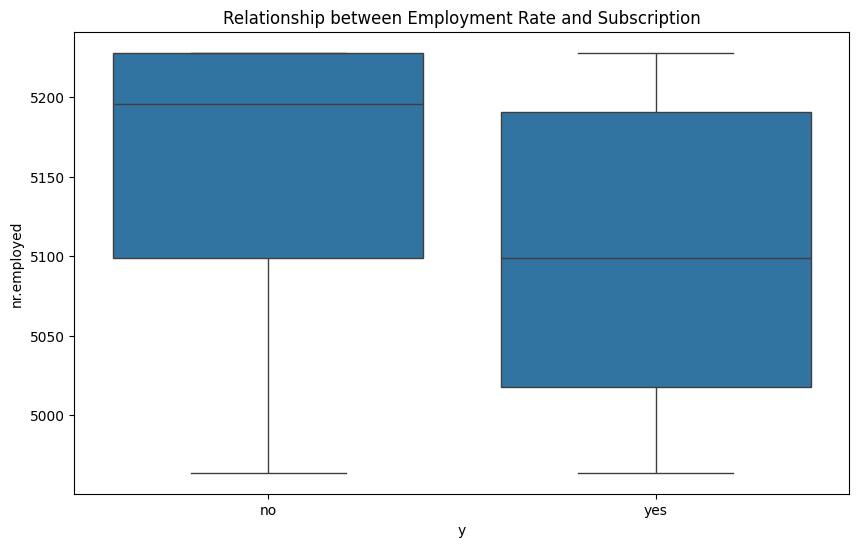

In [33]:

# 1. Visualize the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='nr.employed', data=df)
plt.title('Relationship between Employment Rate and Subscription')
plt.show()


In [34]:
df_final.shape

(37069, 50)

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

# 1. Preprocess data
# already done above

# 2. Prepare training data
X = df_final.drop('y', axis=1)
y = df_final['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Training
custom_max_depth=9
custom_esti=300
# custom_min_leaf=3
clf = RandomForestClassifier(
    n_estimators=custom_esti,
    max_depth=custom_max_depth,
    # min_samples_leaf=custom_min_leaf,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
clf.fit(X_train, y_train)

# 4. Threadshold optimization
y_probs = clf.predict_proba(X_test)[:, 1]
custom_threshold = 0.1
y_pred_custom = (y_probs >= custom_threshold).astype(int)

### 15, 0.2/0.1/0.3: 796(26,24)
### 10, 0.3/0.1: 831(41,27)
### 9, 0.3: 831(41,27)
### 8, 0.3/0.2: 820(43,27)
### 7, 0.1/0.3: 809(45,27)
### 6, 0.1/0.3: 814(44/27)

## derived variables
### 100_10_0.1 28/23/746
### 150_7_0.3 41/27/831
### 200_7_0.3 41/27/831
### 200_7_0.1 41/27/831
### 200_8_0.3 40/27/836.78
### 300_8_0.3 39/27/842
### 300_8_0.1 39/27/842
### 300_10_0.1 28/25/824
### 300_10_0.3 28/25/824
### 300_9_0.3 35/27/864
### 300_9_0.1 35/27/864
### 300_9_0.1_min2 35/27/864

# 5. Report
print(f"--- RandomForest Results (Threshold: {custom_threshold}) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_custom):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_custom):.4f}")
print("\n[Full Classification Report]")
print(classification_report(y_test, y_pred_custom))

importances = pd.Series(clf.feature_importances_, index=X.columns)
print("\n[Top 10 Feature Importances]")
print(importances.sort_values(ascending=False).head(10))

--- RandomForest Results (Threshold: 0.1) ---
Accuracy: 0.1145
F1 Score: 0.2041

[Full Classification Report]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      6572
           1       0.11      1.00      0.20       842

    accuracy                           0.11      7414
   macro avg       0.56      0.50      0.10      7414
weighted avg       0.90      0.11      0.03      7414


[Top 10 Feature Importances]
euribor3m           0.141535
nr.employed         0.136755
eco_stress_idx      0.130175
emp.var.rate        0.102170
age_x_euribor       0.101495
cons.conf.idx       0.051821
pdays               0.041680
cons.price.idx      0.036415
poutcome_success    0.031414
month_may           0.028390
dtype: float64


In [63]:
import pandas as pd

# 1. Load the holdout data
test = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")
df = test.copy()

# --- SAME PREPROCESSING AS TRAINING ---

# Pdays
df['is_new_customer'] = (df['pdays'] == 999).astype(int)
df['pdays'] = df['pdays'].replace(999, -1)

# Education (Ordinal)
edu_mapping = {
    'illiterate': 0, 'unknown': 1, 'basic.4y': 2, 'basic.6y': 3,
    'basic.9y': 4, 'high.school': 5, 'professional.course': 6, 'university.degree': 7
}
df['education'] = df['education'].map(edu_mapping)

# One-hot encoding (Nominal)
categorical_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df_final2 = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- CRITICAL ALIGNMENT STEP ---

# Ensure test columns match training columns (X is your training features)
# This adds missing columns as 0 and removes extra columns
df_final2 = df_final2.reindex(columns=X.columns, fill_value=0)

# --- PREDICTION ---

# Use your trained model (e.g., rf_model or best_rf)
predictions = clf.predict(df_final2)

# --- SAVE RESULTS ---

my_predictions = pd.DataFrame(predictions, columns=['predictions'])

name= str(custom_esti) + "_" + str(custom_max_depth) + "_" + str(custom_threshold) + "_minLeaf" + str(custom_min_leaf) + "_team2-module2-predictions.csv"
my_predictions.to_csv(name, index=False)
print("File saved successfully!")

File saved successfully!


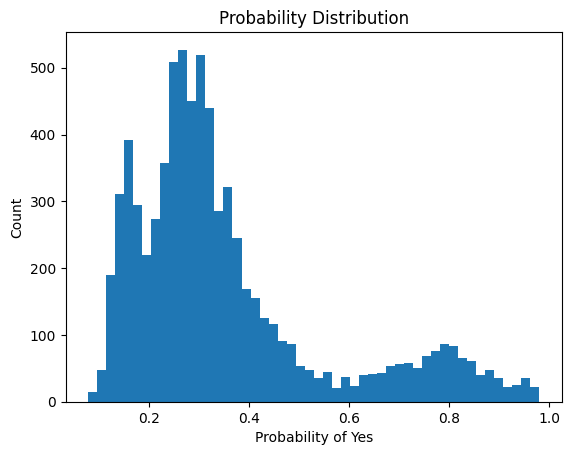

In [37]:
import matplotlib.pyplot as plt

# 모델이 내뱉은 'Yes(1)'일 확률값 가져오기
y_probs = clf.predict_proba(X_test)[:, 1]

# 확률값들이 어디에 몰려있는지 히스토그램 그리기
plt.hist(y_probs, bins=50)
plt.title('Probability Distribution')
plt.xlabel('Probability of Yes')
plt.ylabel('Count')
plt.show()